# Ejemplo de CNN 2D en la base de datos cifar100

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
# Installa TensorFlow
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# descargamos los datos cifar100 y los partimos en train y test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

169009152/169001437 [==============================] - 11s 0us/step


In [4]:
# Tamaño de los datos (#datos,#lado,#alto,#canales)
print(X_train.shape)

(50000, 32, 32, 3)


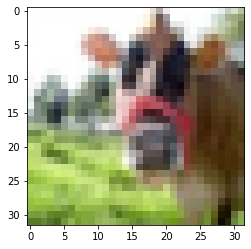

In [5]:
import matplotlib.pyplot as plt

# enseñamos la primera imagen del dataset
plt.imshow(X_train[0],cmap="gray")

In [6]:
# one-hot encoding en las 'y'
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Modelo

In [7]:
# Hacemos un modelo con varias capas

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras import regularizers

#crear modelo
model = Sequential()

#Vamos añadiendo capas
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3),
                activity_regularizer=regularizers.l1(0.2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(32, kernel_size=3, activation='relu',
                activity_regularizer=regularizers.l1(0.2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(16, kernel_size=3, activation='relu',
                activity_regularizer=regularizers.l1(0.2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(100, activation='softmax'))

In [8]:
# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Este es el modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        4

In [11]:
# Vamos a usar el callback de earlystopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.01)

In [12]:
# Entrenamos
hist = model.fit(X_train, y_train, validation_split=0.3, epochs=50, callbacks=[early_stopping])

Epoch 1/50
1094/1094 [==============================] - 7s 6ms/step - loss: 1823.8511 - accuracy: 0.0113 - val_loss: 13.0121 - val_accuracy: 0.0097
Epoch 2/50
1094/1094 [==============================] - 6s 6ms/step - loss: 9.5329 - accuracy: 0.0100 - val_loss: 7.1972 - val_accuracy: 0.0089
Epoch 3/50
1094/1094 [==============================] - 6s 6ms/step - loss: 6.1631 - accuracy: 0.0098 - val_loss: 5.6913 - val_accuracy: 0.0098
Epoch 4/50
1094/1094 [==============================] - 7s 6ms/step - loss: 5.2616 - accuracy: 0.0097 - val_loss: 5.1567 - val_accuracy: 0.0081
Epoch 5/50
1094/1094 [==============================] - 7s 6ms/step - loss: 4.9299 - accuracy: 0.0105 - val_loss: 4.9099 - val_accuracy: 0.0098
Epoch 6/50
1094/1094 [==============================] - 6s 6ms/step - loss: 4.7761 - accuracy: 0.0100 - val_loss: 4.7909 - val_accuracy: 0.0107
Epoch 7/50
1094/1094 [==============================] - 6s 6ms/step - loss: 4.6997 - accuracy: 0.0103 - val_loss: 4.7213 - val_accur

In [13]:
# Evaluamos el modelo
score = model.evaluate(X_test,y_test)
score

313/313 [==============================] - 1s 2ms/step - loss: 4.6170 - accuracy: 0.0100


[4.61702823638916, 0.009999999776482582]

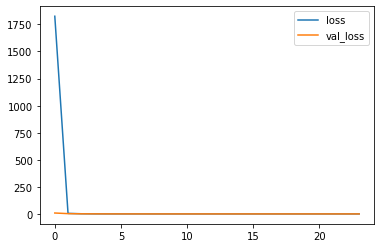

In [15]:
# Ploteamos la evolucion del loss durante el entrenamiento
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure
plt.plot(hist.history['loss'],label="loss")
plt.plot(hist.history['val_loss'],label="val_loss")
plt.legend()


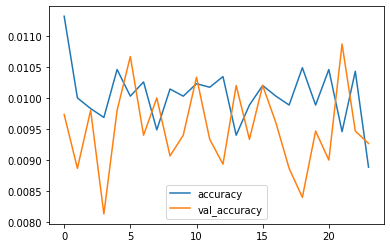

In [16]:
# Ploteamos la evolucion del accuracy durante el entrenamiento
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure
plt.plot(hist.history['accuracy'],label="accuracy")
plt.plot(hist.history['val_accuracy'],label="val_accuracy")
plt.legend()


In [17]:
# Predecimos sobre test
preds_test = model.predict(X_test)
preds_test.shape

(10000, 100)

58


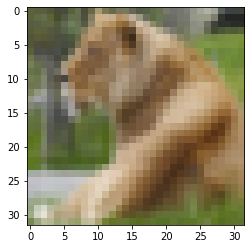

In [27]:
import numpy as np
# Elegimos una imagen de test
idx_mostrar = 2990
# Mostramos la imagen
plt.imshow(X_test[idx_mostrar,:,:,:])
# Mostramos las probabilidades que da el modelo a cada clase
print(np.argmax(preds_test[idx_mostrar]))